--- Solving for Assam Districts Map (4 Colors) ---

--- Running Plain Backtracking ---
Plain Backtracking Solution: {'Baksa': 'Red', 'Barpeta': 'Green', 'Biswanath': 'Red', 'Bongaigaon': 'Red', 'Cachar': 'Red', 'Charaideo': 'Red', 'Chirang': 'Blue', 'Darrang': 'Green', 'Dhemaji': 'Red', 'Dhubri': 'Green', 'Dibrugarh': 'Green', 'Dima Hasao': 'Green', 'Goalpara': 'Blue', 'Golaghat': 'Green', 'Hailakandi': 'Blue', 'Jorhat': 'Red', 'Kamrup': 'Yellow', 'Kamrup Metropolitan': 'Red', 'Karbi Anglong': 'Blue', 'Karimganj': 'Green', 'Kokrajhar': 'Yellow', 'Lakhimpur': 'Green', 'Majuli': 'Blue', 'Morigaon': 'Blue', 'Nagaon': 'Red', 'Nalbari': 'Blue', 'Sivasagar': 'Blue', 'Sonitpur': 'Yellow', 'South Salmara-Mankachar': 'Red', 'Tinsukia': 'Blue', 'Udalguri': 'Blue'}
Plain Backtracking Steps: 32


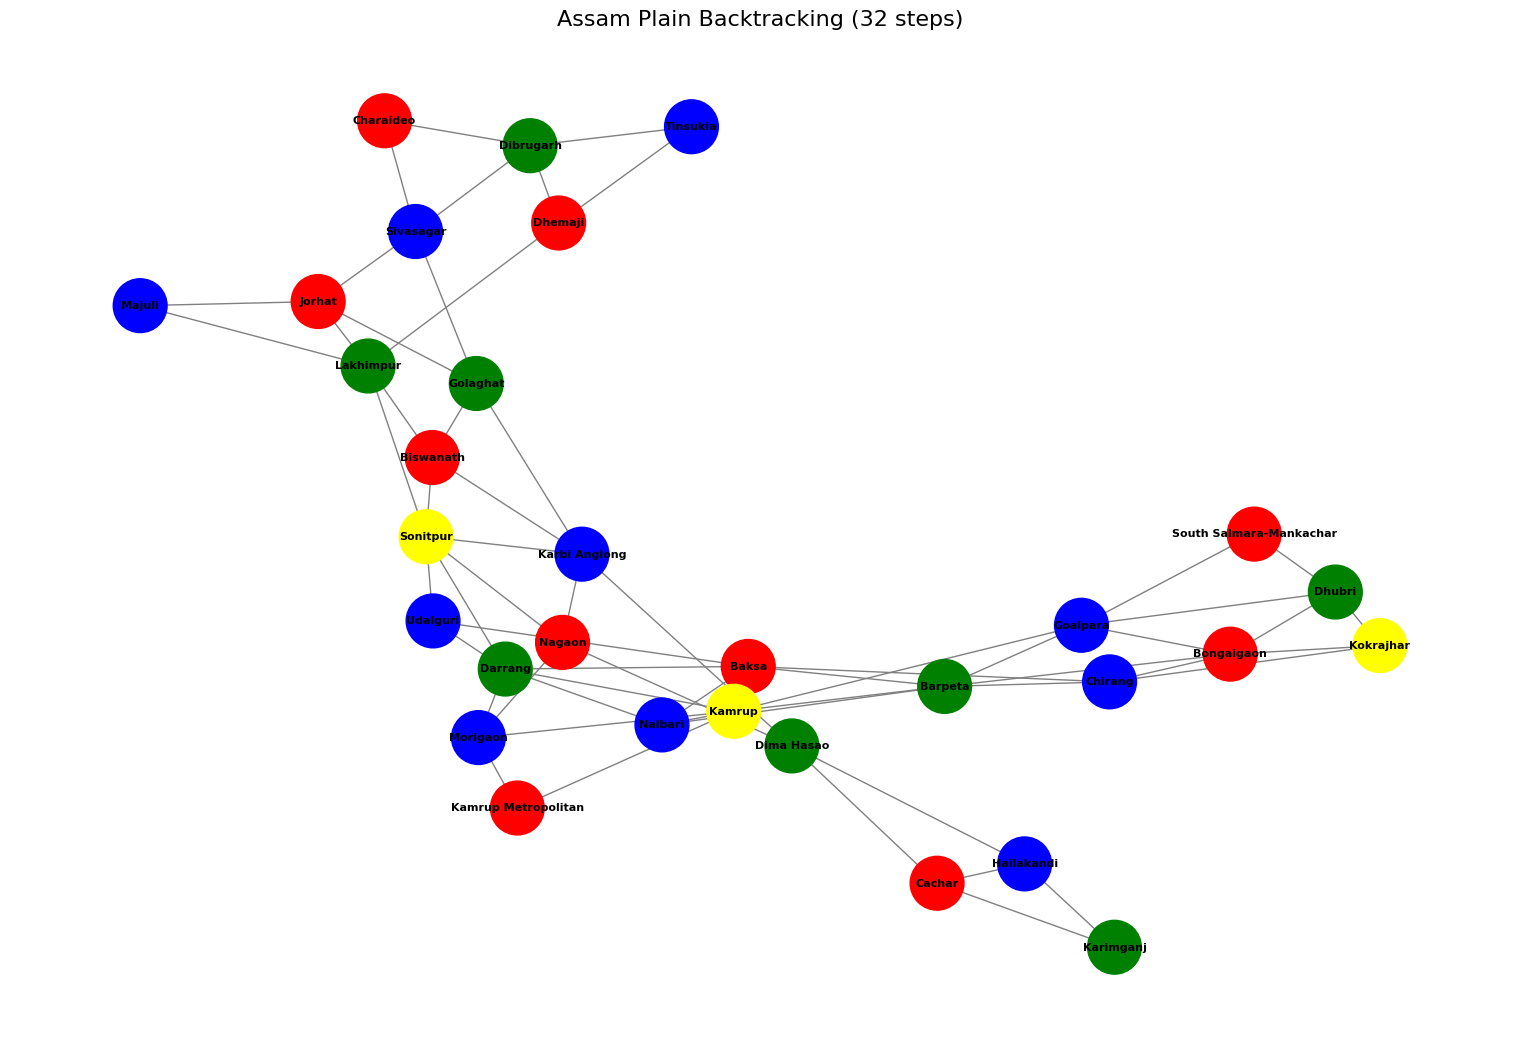

----------------------------------------

--- Running Backtracking with MRV + LCV ---
Backtracking with MRV + LCV Solution: {'Baksa': 'Red', 'Barpeta': 'Green', 'Biswanath': 'Red', 'Bongaigaon': 'Red', 'Cachar': 'Red', 'Charaideo': 'Red', 'Chirang': 'Blue', 'Darrang': 'Green', 'Dhemaji': 'Red', 'Dhubri': 'Green', 'Dibrugarh': 'Green', 'Dima Hasao': 'Green', 'Goalpara': 'Blue', 'Golaghat': 'Green', 'Hailakandi': 'Blue', 'Jorhat': 'Red', 'Kamrup': 'Yellow', 'Kamrup Metropolitan': 'Red', 'Karbi Anglong': 'Blue', 'Karimganj': 'Green', 'Kokrajhar': 'Yellow', 'Lakhimpur': 'Green', 'Majuli': 'Blue', 'Morigaon': 'Blue', 'Nagaon': 'Red', 'Nalbari': 'Blue', 'Sivasagar': 'Blue', 'Sonitpur': 'Yellow', 'South Salmara-Mankachar': 'Red', 'Tinsukia': 'Blue', 'Udalguri': 'Blue'}
Backtracking with MRV + LCV Steps: 32


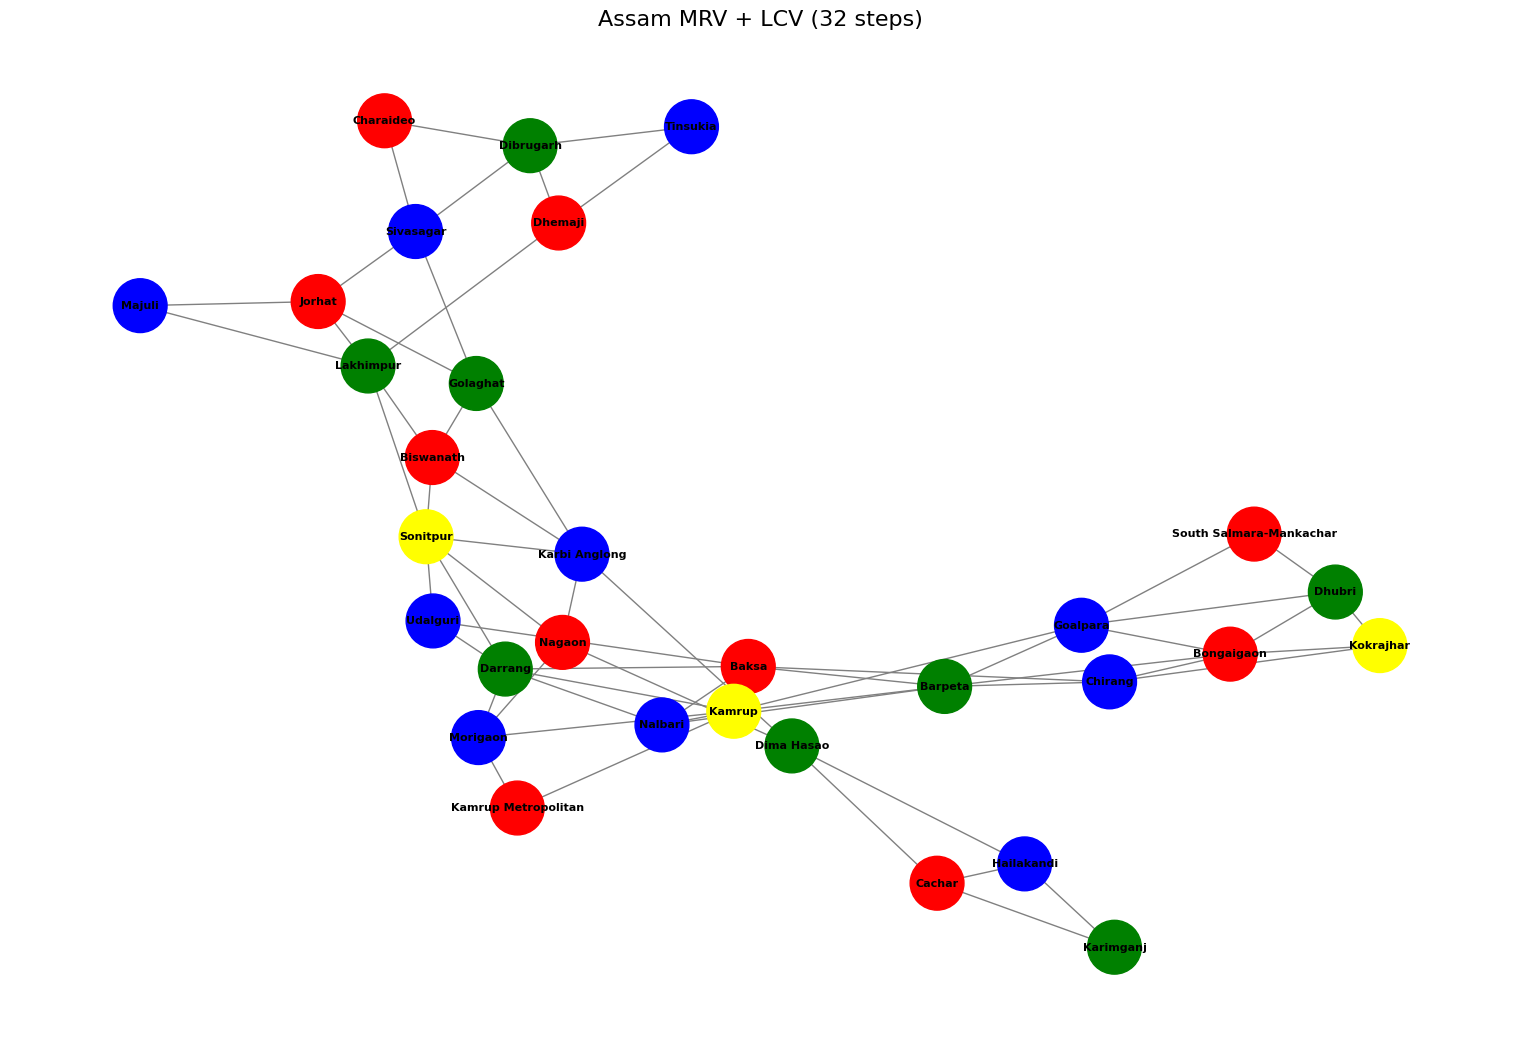

----------------------------------------

--- Running Backtracking with MRV + LCV + AC-3 ---
Backtracking with MRV + LCV + AC-3 Solution: {'Baksa': 'Red', 'Barpeta': 'Green', 'Chirang': 'Blue', 'Bongaigaon': 'Red', 'Goalpara': 'Blue', 'Kamrup': 'Yellow', 'Nalbari': 'Blue', 'Darrang': 'Green', 'Dhubri': 'Green', 'Kokrajhar': 'Yellow', 'Morigaon': 'Red', 'Kamrup Metropolitan': 'Green', 'South Salmara-Mankachar': 'Red', 'Udalguri': 'Blue', 'Sonitpur': 'Red', 'Biswanath': 'Green', 'Karbi Anglong': 'Blue', 'Golaghat': 'Red', 'Lakhimpur': 'Blue', 'Jorhat': 'Green', 'Majuli': 'Red', 'Nagaon': 'Green', 'Dima Hasao': 'Red', 'Sivasagar': 'Blue', 'Cachar': 'Green', 'Hailakandi': 'Blue', 'Karimganj': 'Red', 'Charaideo': 'Red', 'Dibrugarh': 'Green', 'Dhemaji': 'Red', 'Tinsukia': 'Blue'}
Backtracking with MRV + LCV + AC-3 Steps: 32


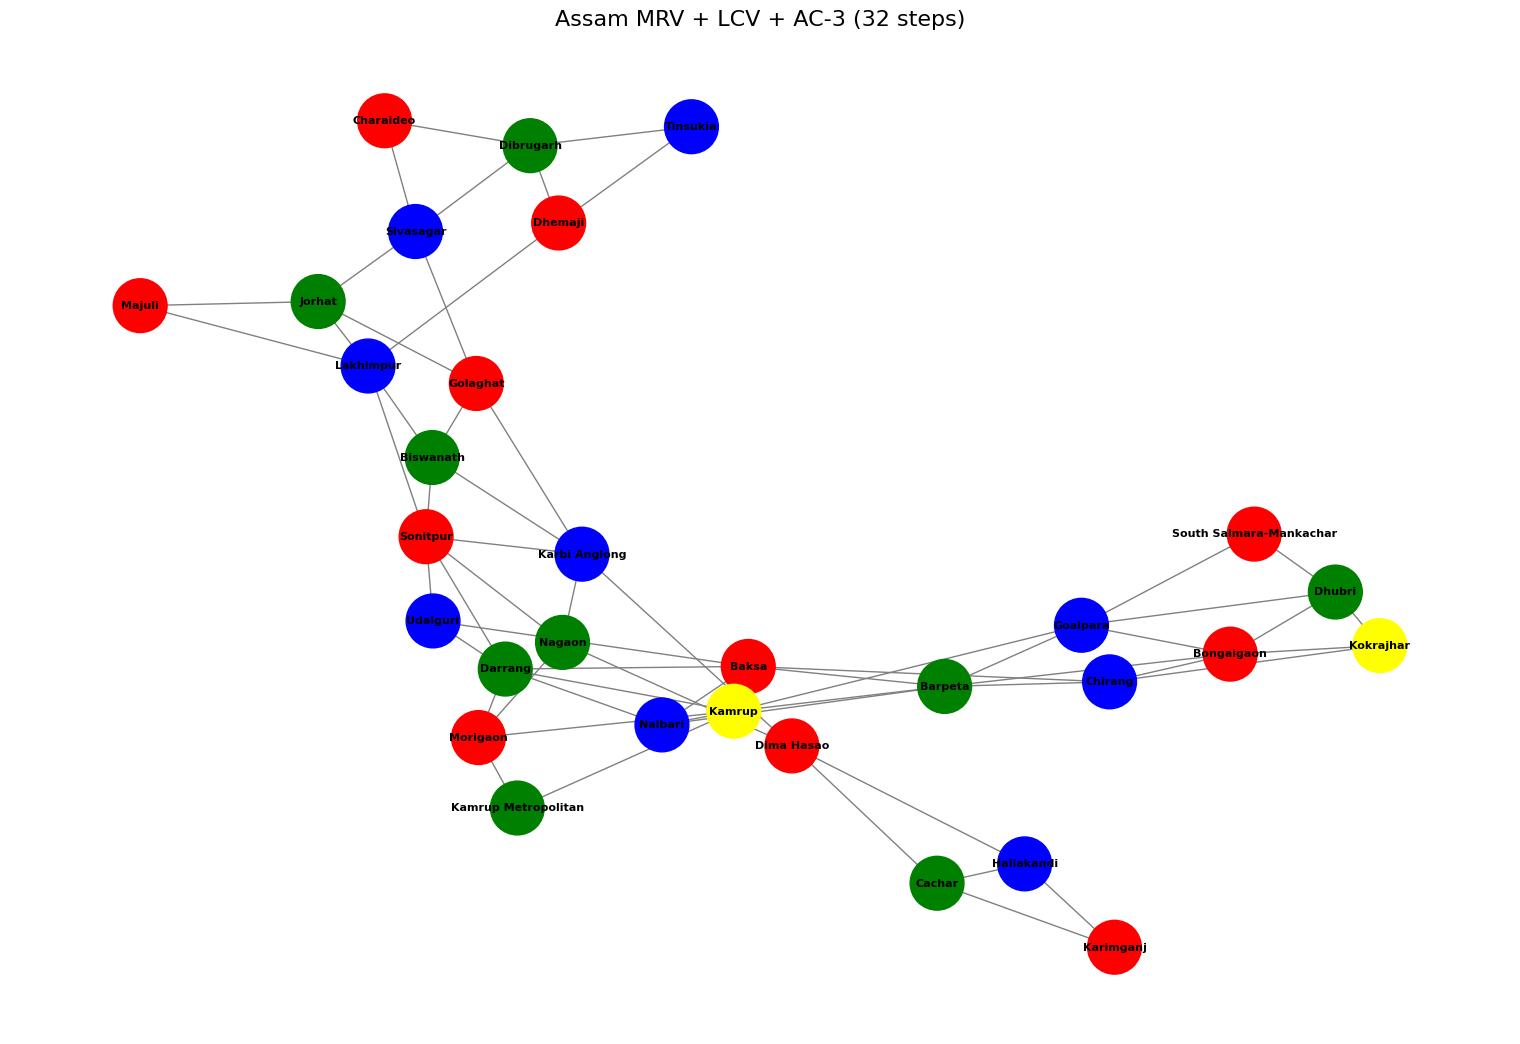

----------------------------------------



In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import copy
from collections import deque

# --- CSP SETUP: ASSAM DISTRICTS MAP ---

# 1. Variables: List of districts
variables = [
    'Baksa', 'Barpeta', 'Biswanath', 'Bongaigaon', 'Cachar', 'Charaideo', 
    'Chirang', 'Darrang', 'Dhemaji', 'Dhubri', 'Dibrugarh', 'Dima Hasao', 
    'Goalpara', 'Golaghat', 'Hailakandi', 'Jorhat', 'Kamrup', 'Kamrup Metropolitan', 
    'Karbi Anglong', 'Karimganj', 'Kokrajhar', 'Lakhimpur', 'Majuli', 'Morigaon', 
    'Nagaon', 'Nalbari', 'Sivasagar', 'Sonitpur', 'South Salmara-Mankachar', 
    'Tinsukia', 'Udalguri'
]

# 2. Domain: The set of 4 available colors
colors = ['Red', 'Green', 'Blue', 'Yellow']

# 3. Constraints: Adjacency list for neighbors
neighbors = {
    'Kokrajhar': ['Dhubri', 'Bongaigaon', 'Chirang'],
    'Dhubri': ['Kokrajhar', 'Bongaigaon', 'Goalpara', 'South Salmara-Mankachar'],
    'South Salmara-Mankachar': ['Dhubri', 'Goalpara'],
    'Goalpara': ['Dhubri', 'Bongaigaon', 'Barpeta', 'Kamrup', 'South Salmara-Mankachar'],
    'Bongaigaon': ['Kokrajhar', 'Dhubri', 'Chirang', 'Barpeta', 'Goalpara'],
    'Chirang': ['Kokrajhar', 'Bongaigaon', 'Barpeta', 'Baksa'],
    'Barpeta': ['Bongaigaon', 'Chirang', 'Baksa', 'Nalbari', 'Kamrup', 'Goalpara'],
    'Baksa': ['Chirang', 'Barpeta', 'Nalbari', 'Udalguri', 'Kamrup'],
    'Nalbari': ['Barpeta', 'Baksa', 'Kamrup', 'Darrang'],
    'Kamrup': ['Goalpara', 'Barpeta', 'Baksa', 'Nalbari', 'Darrang', 'Kamrup Metropolitan', 'Morigaon'],
    'Kamrup Metropolitan': ['Kamrup', 'Morigaon'],
    'Darrang': ['Nalbari', 'Baksa', 'Udalguri', 'Sonitpur', 'Kamrup', 'Morigaon'],
    'Udalguri': ['Baksa', 'Darrang', 'Sonitpur'],
    'Sonitpur': ['Udalguri', 'Darrang', 'Biswanath', 'Lakhimpur', 'Nagaon', 'Karbi Anglong'],
    'Morigaon': ['Kamrup', 'Kamrup Metropolitan', 'Darrang', 'Nagaon'],
    'Nagaon': ['Morigaon', 'Sonitpur', 'Karbi Anglong', 'Dima Hasao'],
    'Karbi Anglong': ['Sonitpur', 'Nagaon', 'Dima Hasao', 'Golaghat', 'Biswanath'],
    'Dima Hasao': ['Nagaon', 'Karbi Anglong', 'Cachar', 'Hailakandi'],
    'Cachar': ['Dima Hasao', 'Hailakandi', 'Karimganj'],
    'Hailakandi': ['Dima Hasao', 'Cachar', 'Karimganj'],
    'Karimganj': ['Cachar', 'Hailakandi'],
    'Biswanath': ['Sonitpur', 'Golaghat', 'Karbi Anglong', 'Lakhimpur'],
    'Lakhimpur': ['Sonitpur', 'Biswanath', 'Majuli', 'Dhemaji', 'Jorhat'],
    'Dhemaji': ['Lakhimpur', 'Tinsukia', 'Dibrugarh'],
    'Tinsukia': ['Dhemaji', 'Dibrugarh'],
    'Dibrugarh': ['Dhemaji', 'Tinsukia', 'Sivasagar', 'Charaideo'],
    'Charaideo': ['Dibrugarh', 'Sivasagar'],
    'Sivasagar': ['Dibrugarh', 'Charaideo', 'Jorhat', 'Golaghat'],
    'Jorhat': ['Sivasagar', 'Golaghat', 'Majuli', 'Lakhimpur'],
    'Majuli': ['Lakhimpur', 'Jorhat'],
    'Golaghat': ['Biswanath', 'Karbi Anglong', 'Sivasagar', 'Jorhat']
}

# --- UTILITY AND VISUALIZATION FUNCTIONS ---

def is_valid(assignment, var, value):
    for neighbor in neighbors.get(var, []):
        if neighbor in assignment and assignment[neighbor] == value:
            return False
    return True

def visualize_coloring(solution, title):
    G = nx.Graph(neighbors)
    pos = nx.spring_layout(G, seed=42) 
    
    node_colors = [solution.get(node, "white") for node in G.nodes()]
    
    plt.figure(figsize=(15, 10))
    nx.draw(
        G, pos,
        with_labels=True,
        node_color=node_colors,
        node_size=1500,
        font_size=8,
        font_weight="bold",
        edge_color="grey"
    )
    plt.title(title, fontsize=16)
    plt.show()

# --- ALGORITHM 1: PLAIN BACKTRACKING ---

plain_steps = 0
def backtrack_plain(assignment):
    global plain_steps
    plain_steps += 1
    
    if len(assignment) == len(variables):
        return assignment
        
    var = next(v for v in variables if v not in assignment)
    
    for value in colors:
        if is_valid(assignment, var, value):
            assignment[var] = value
            result = backtrack_plain(assignment)
            if result:
                return result
            del assignment[var] 
    return None

# --- ALGORITHM 2: BACKTRACKING WITH MRV & LCV HEURISTICS ---

heuristic_steps = 0

def select_unassigned_var_mrv(assignment, domains):
    unassigned = [v for v in variables if v not in assignment]
    return min(unassigned, key=lambda var: len(domains[var]))

def order_domain_values_lcv(var, assignment, domains):
    def conflicts(value):
        count = 0
        for neighbor in neighbors[var]:
            if neighbor not in assignment and value in domains[neighbor]:
                count += 1
        return count
    return sorted(domains[var], key=conflicts)
    
def backtrack_heuristic(assignment, domains):
    global heuristic_steps
    heuristic_steps += 1
    
    if len(assignment) == len(variables):
        return assignment
    
    var = select_unassigned_var_mrv(assignment, domains)
    
    for value in order_domain_values_lcv(var, assignment, domains):
        if is_valid(assignment, var, value):
            assignment[var] = value
            result = backtrack_heuristic(assignment, domains)
            if result:
                return result
            del assignment[var]
    return None

# --- ALGORITHM 3: BACKTRACKING WITH MRV, LCV + AC-3 ---

ac3_steps = 0

def revise(domains, xi, xj):
    revised = False
    for x_val in domains[xi][:]:
        if not any(x_val != y_val for y_val in domains[xj]):
            domains[xi].remove(x_val)
            revised = True
    return revised

def ac3(domains, queue=None):
    if queue is None:
        queue = deque([(v, n) for v in variables for n in neighbors[v]])
    
    while queue:
        xi, xj = queue.popleft()
        if revise(domains, xi, xj):
            if not domains[xi]:
                return False
            for xk in neighbors[xi]:
                if xk != xj:
                    queue.append((xk, xi))
    return True

def backtrack_ac3(assignment, domains):
    global ac3_steps
    ac3_steps += 1
    
    if len(assignment) == len(variables):
        return assignment
        
    var = select_unassigned_var_mrv(assignment, domains)
    
    for value in order_domain_values_lcv(var, assignment, domains):
        if is_valid(assignment, var, value):
            assignment[var] = value
            
            local_domains = copy.deepcopy(domains)
            local_domains[var] = [value]
            
            if ac3(local_domains, deque([(neighbor, var) for neighbor in neighbors[var]])):
                result = backtrack_ac3(assignment, local_domains)
                if result:
                    return result

            del assignment[var]
    return None

# --- MAIN DEMO EXECUTION ---

if __name__ == "__main__":
    print("--- Solving for Assam Districts Map (4 Colors) ---")
    
    # 1. Plain Backtracking
    print("\n--- Running Plain Backtracking ---")
    plain_solution = backtrack_plain({})
    print("Plain Backtracking Solution:", plain_solution)
    print("Plain Backtracking Steps:", plain_steps)
    if plain_solution:
        visualize_coloring(plain_solution, f"Assam Plain Backtracking ({plain_steps} steps)")
    print("-" * 40 + "\n")

    # 2. Backtracking with MRV + LCV
    print("--- Running Backtracking with MRV + LCV ---")
    initial_domains_heuristic = {var: list(colors) for var in variables}
    heuristic_solution = backtrack_heuristic({}, initial_domains_heuristic)
    print("Backtracking with MRV + LCV Solution:", heuristic_solution)
    print("Backtracking with MRV + LCV Steps:", heuristic_steps)
    if heuristic_solution:
        visualize_coloring(heuristic_solution, f"Assam MRV + LCV ({heuristic_steps} steps)")
    print("-" * 40 + "\n")

    # 3. Backtracking with MRV + LCV + AC-3
    print("--- Running Backtracking with MRV + LCV + AC-3 ---")
    initial_domains_ac3 = {var: list(colors) for var in variables}
    ac3(initial_domains_ac3) 
    ac3_solution = backtrack_ac3({}, initial_domains_ac3)
    print("Backtracking with MRV + LCV + AC-3 Solution:", ac3_solution)
    print("Backtracking with MRV + LCV + AC-3 Steps:", ac3_steps)
    if ac3_solution:
        visualize_coloring(ac3_solution, f"Assam MRV + LCV + AC-3 ({ac3_steps} steps)")
    print("-" * 40 + "\n")